## WEEK 3 PART 2 ASSIGNMENT
### DATA 620
### Maliat Islam, Layla Quinones, and Karim Hammoud

### Assignment Detail:
#### DAVIS SOUTHERN CLUB WOMEN
#### DATASET http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/davis.dat

#### DESCRIPTION One 18×14 matrix, binary.

#### BACKGROUND These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.
#### What can you infer about the relationships between (1) the women, and (2) the social events?


#### Here is the link for the recording:
https://youtu.be/FCQskFtU9Mo

#### In this assignment we are going to analyze Two mode network. 
#### Many network dataset are by definition two-mode networks (also known as affiliation or bipartite networks). These are a particular type of networks with two sets of nodes and ties are only established between nodes belonging to different sets.
#### We have 18 women and 14 events in this dataset.

In [56]:
##Importing Libraries
import networkx as nx
import math
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial import distance
from collections import defaultdict
from pylab import rcParams
import matplotlib.colors as colors

import pandas as pd

plt.figure(figsize=(17,8))
%matplotlib inline

#### Loading Data

In [52]:
G = nx.davis_southern_women_graph()


#### Exploring nodes and edges

In [53]:
G.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

In [54]:
G.edges()

EdgeView([('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', 'E5'), ('Theresa Anderson', 'E6'), ('Theresa Anderson', 'E7'), ('Theresa Anderson', 'E8'), ('Theresa Anderson', 'E9'), ('Brenda Rogers', 'E1'), ('Brenda Rogers', 'E3'), ('Brenda Rogers', 'E4'), ('Brenda Rogers', 'E5'), ('Brenda Rogers', 'E6'), ('Brenda Rogers', 'E7'), ('Brenda Rogers', 'E8'), ('Charlotte McDowd', 'E3'), ('Charlotte McDowd', 'E4'), ('Charlotte McDowd', 'E5'), ('Charlotte McDowd', 'E7'), ('Frances Anderson', 'E3'), ('Frances Anderson', 'E5'), ('F

In [46]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 89\nAverage degree:   5.5625'

### visualizing two modes network



{'Evelyn Jefferson': Text(0.5623077339232722, -0.004063757093226339, 'Evelyn Jefferson'),
 'Laura Mandeville': Text(0.6260476730834319, 0.1834009407344982, 'Laura Mandeville'),
 'Theresa Anderson': Text(0.4221787302541032, 0.1557797822123484, 'Theresa Anderson'),
 'Brenda Rogers': Text(0.5459874140179927, 0.1452674568871446, 'Brenda Rogers'),
 'Charlotte McDowd': Text(0.5996523022504896, 0.6870564337281297, 'Charlotte McDowd'),
 'Frances Anderson': Text(0.3085523077926277, 0.5649939584989055, 'Frances Anderson'),
 'Eleanor Nye': Text(0.08758464928507324, 0.5353602589217905, 'Eleanor Nye'),
 'Pearl Oglethorpe': Text(0.2506750665072225, -0.3418492537550718, 'Pearl Oglethorpe'),
 'Ruth DeSand': Text(-0.06302069146892966, 0.3438550870507961, 'Ruth DeSand'),
 'Verne Sanderson': Text(-0.29561603782761875, 0.04758448981981645, 'Verne Sanderson'),
 'Myra Liddel': Text(-0.4985803264849672, -0.3954643573942687, 'Myra Liddel'),
 'Katherina Rogers': Text(-0.6608754367407512, 0.038923576711953935, 

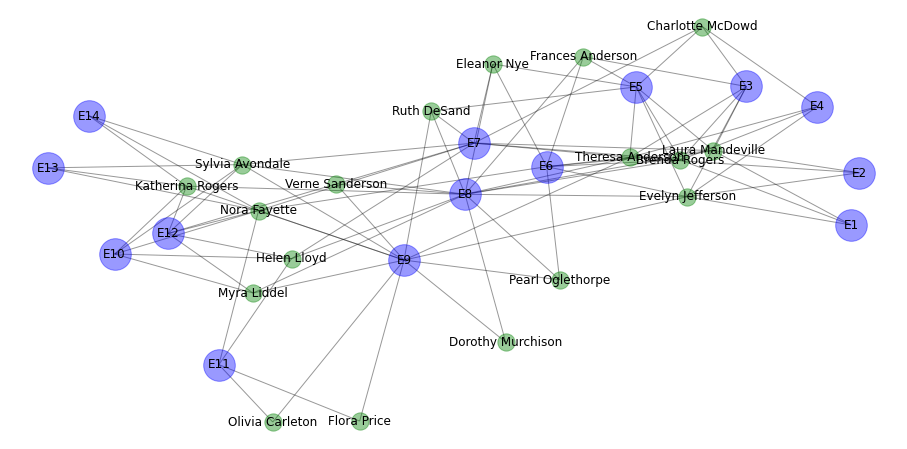

In [58]:
#visualize two mode network:
women,events=nx.bipartite.sets(G)
plt.rcParams['figure.figsize']=(16,8)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=women,node_color='green',alpha=0.4)
nx.draw_networkx_nodes(G,pos,nodelist=events,node_color='blue',alpha=0.4,node_size=1000)
nx.draw_networkx_edges(G, pos,alpha=0.4)
nx.draw_networkx_labels(G,pos)


#### The fourteen women and events have various connections. E7,E8,E9 seems to be really popular. Evelyn Jefferson,Nora Fayette, Theresa Anderson have attended more events than their peers. We can also notice two cliques. Four events were attended only by those cliques.There are also some women who do not belong to any cliques.

### Measurement of Distance

In [62]:
print('Center =',nx.center(G))
print('Diameter =',nx.diameter(G))
print('Radius =',nx.radius(G))
       

Center = ['Evelyn Jefferson', 'Theresa Anderson', 'Ruth DeSand', 'Verne Sanderson', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'E6', 'E7', 'E8', 'E9']
Diameter = 4
Radius = 3


#### We can observe the radius and diameter are similar.

In [63]:
list(G.degree())


[('Evelyn Jefferson', 8),
 ('Laura Mandeville', 7),
 ('Theresa Anderson', 8),
 ('Brenda Rogers', 7),
 ('Charlotte McDowd', 4),
 ('Frances Anderson', 4),
 ('Eleanor Nye', 4),
 ('Pearl Oglethorpe', 3),
 ('Ruth DeSand', 4),
 ('Verne Sanderson', 4),
 ('Myra Liddel', 4),
 ('Katherina Rogers', 6),
 ('Sylvia Avondale', 7),
 ('Nora Fayette', 8),
 ('Helen Lloyd', 5),
 ('Dorothy Murchison', 2),
 ('Olivia Carleton', 2),
 ('Flora Price', 2),
 ('E1', 3),
 ('E2', 3),
 ('E3', 6),
 ('E4', 4),
 ('E5', 8),
 ('E6', 8),
 ('E7', 10),
 ('E8', 14),
 ('E9', 12),
 ('E10', 5),
 ('E11', 4),
 ('E12', 6),
 ('E13', 3),
 ('E14', 3)]

### Bipartite Graph
#### We have separated the events and the women to analyze our data.

### Analyzing Women Node:

In [69]:
### project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
pd.DataFrame(list(W.degree()),columns=["Member","#Friends"]).sort_values('#Friends', ascending=False)

,Member,#Friends
0,Evelyn Jefferson,17
8,Ruth DeSand,17
14,Helen Lloyd,17
13,Nora Fayette,17
12,Sylvia Avondale,17
9,Verne Sanderson,17
2,Theresa Anderson,17
7,Pearl Oglethorpe,16
10,Myra Liddel,16
11,Katherina Rogers,16


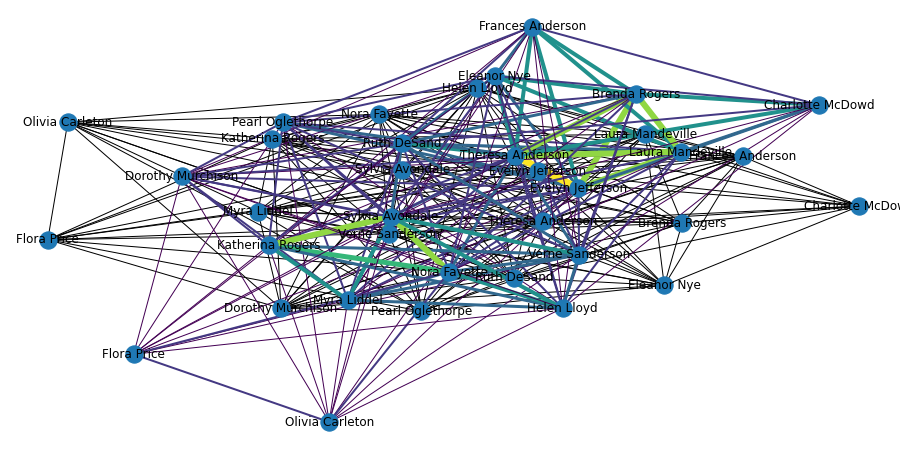

In [82]:
women = G.graph['top']
W = bipartite.weighted_projected_graph(G, women, ratio=False)
nx.draw_networkx(W, with_labels=True)
weights=[edata['weight'] for f,t, edata in W.edges(data=True)]
plt.rcParams['figure.figsize']=(16,8)
nx.draw_networkx(W, width=weights,edge_color=weights)
plt.axis('off')
plt.show()

#### We have used cliques function to identify cliques in the network.

In [78]:
list(nx.find_cliques(W))

[['Nora Fayette',
  'Theresa Anderson',
  'Ruth DeSand',
  'Helen Lloyd',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Evelyn Jefferson',
  'Dorothy Murchison',
  'Katherina Rogers',
  'Pearl Oglethorpe',
  'Myra Liddel',
  'Flora Price',
  'Olivia Carleton'],
 ['Nora Fayette',
  'Theresa Anderson',
  'Ruth DeSand',
  'Helen Lloyd',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Evelyn Jefferson',
  'Dorothy Murchison',
  'Katherina Rogers',
  'Pearl Oglethorpe',
  'Myra Liddel',
  'Eleanor Nye',
  'Laura Mandeville',
  'Frances Anderson',
  'Brenda Rogers'],
 ['Nora Fayette',
  'Theresa Anderson',
  'Ruth DeSand',
  'Helen Lloyd',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Evelyn Jefferson',
  'Charlotte McDowd',
  'Eleanor Nye',
  'Laura Mandeville',
  'Frances Anderson',
  'Brenda Rogers']]

In [89]:
womens_degree=W.degree(W)
pd.DataFrame(womens_degree,columns=['Women','Degree'])
                                    

,Women,Degree
0,Evelyn Jefferson,17
1,Laura Mandeville,15
2,Theresa Anderson,17
3,Brenda Rogers,15
4,Charlotte McDowd,11
5,Frances Anderson,15
6,Eleanor Nye,15
7,Pearl Oglethorpe,16
8,Ruth DeSand,17
9,Verne Sanderson,17


### Analyzing Social Event Node

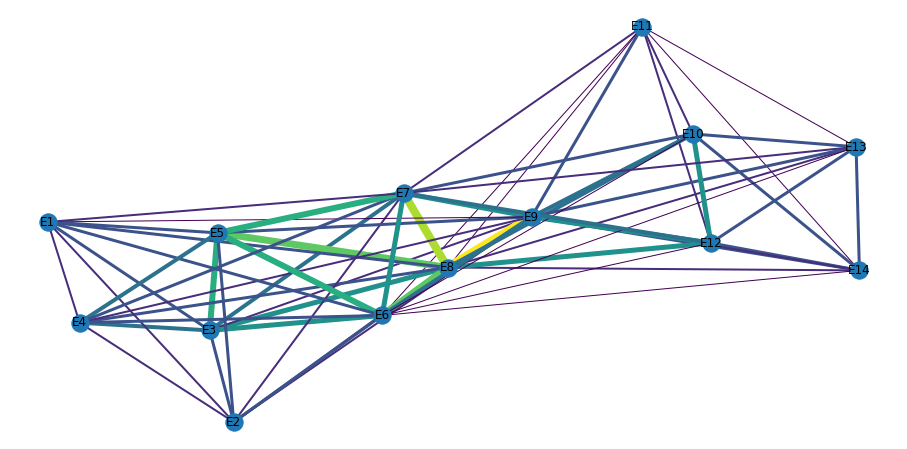

In [81]:
EVENTS = G.graph['bottom']
E = bipartite.weighted_projected_graph(G, events, ratio=False)
weights=[edata['weight'] for f,t, edata in E.edges(data=True)]
plt.rcParams['figure.figsize']=(16,8)
nx.draw_networkx(E,width=weights,edge_color=weights)
plt.axis('off')
plt.show()

In [83]:
print(nx.info(E))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


In [88]:
events_degree=E.degree(E)
pd.DataFrame(events_degree,columns=['SocialEvents','Degree'])

,SocialEvents,Degree
0,E11,8
1,E14,8
2,E3,8
3,E8,13
4,E2,8
5,E9,13
6,E6,13
7,E12,8
8,E4,8
9,E5,8


### Conclusions:
#### Well connected closed network and the degree centrality along with closeness seems to be high. Events E7, E8, E9 have very large attendance when compared to the others. There’s a few strong sub networks between (Laura, Brenda, Theresa, Evelyn) and (Sylvia, Helen, Katherine, Nora). 